<a href="https://colab.research.google.com/github/DiogoAmaro13/GIH-Simulation/blob/main/Simula%C3%A7%C3%A3o_GIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of patients
num_patients = 2500

# Generate synthetic data for the "current system"
current_data = {
    "Patient_ID": np.arange(1, num_patients + 1),
    "Num_Trips": np.random.randint(3, 7, num_patients),  # Patients take 3-6 trips
    "Avg_Travel_Time_per_Trip_Min": np.random.randint(10, 90, num_patients),  # 20-60 minutes per trip
    "Travel_Cost_per_Trip_EUR": np.random.uniform(5, 20, num_patients),  # 5-20 EUR per trip
    "Stress_Level": np.random.uniform(5, 10, num_patients),  # Stress level on a scale of 1-10
}

# Create a DataFrame for the current system
current_df = pd.DataFrame(current_data)

In [ ]:
current_df.tail()

,Patient_ID,Num_Trips,Avg_Travel_Time_per_Trip_Min,Travel_Cost_per_Trip_EUR,Stress_Level
2495,2496,6,56,19.874365,7.058738
2496,2497,6,74,7.454243,6.664751
2497,2498,4,38,15.376665,8.347060
2498,2499,5,59,15.114404,6.080679
2499,2500,6,22,19.699332,7.954360


In [ ]:
# Simulate data for the "platform system" with improvements
platform_data = {
    "Patient_ID": current_df["Patient_ID"],
    "Num_Trips": (current_df["Num_Trips"] * 0.5).round().astype(int),  # Reduce trips by 50%
    "Avg_Travel_Time_per_Trip_Min": (current_df["Avg_Travel_Time_per_Trip_Min"] * 0.6).round(),  # Reduce time by 40%
    "Travel_Cost_per_Trip_EUR": (current_df["Travel_Cost_per_Trip_EUR"] * 0.7).round(2),  # Reduce cost by 30%
    "Stress_Level": (current_df["Stress_Level"] * 0.7).round(2),  # Reduce stress by 30%
}

# Create a DataFrame for the platform system
platform_df = pd.DataFrame(platform_data)

In [ ]:
# Combine both datasets for comparison
comparison_df = current_df.merge(platform_df, on="Patient_ID", suffixes=("_Current", "_Platform"))
comparison_df.head()

,Patient_ID,Num_Trips_Current,Avg_Travel_Time_per_Trip_Min_Current,Travel_Cost_per_Trip_EUR_Current,Stress_Level_Current,Num_Trips_Platform,Avg_Travel_Time_per_Trip_Min_Platform,Travel_Cost_per_Trip_EUR_Platform,Stress_Level_Platform
0,1,5,55,18.057904,9.928004,2,33.0,12.64,6.95
1,2,6,24,14.471284,8.433393,3,14.0,10.13,5.90
2,3,3,34,12.987561,6.218074,2,20.0,9.09,4.35
3,4,5,87,6.730920,8.992779,2,52.0,4.71,6.29
4,5,5,80,14.084568,5.535146,2,48.0,9.86,3.87


In [ ]:
# initialize data of lists.
data = {'Métrica': ['Tempo Total de Viagem (min)', 'Número de Deslocações', 'Custo Total p/Viagem (€)', 'Índice de Stress Emocional'],
        'Sistema Atual': [current_df.loc[:, 'Avg_Travel_Time_per_Trip_Min'].mean(), current_df.loc[:, 'Num_Trips'].mean(), current_df.loc[:, 'Travel_Cost_per_Trip_EUR'].mean(), current_df.loc[:, 'Stress_Level'].mean()],
        'MEDISYNC': [platform_df.loc[:, 'Avg_Travel_Time_per_Trip_Min'].mean(),platform_df.loc[:, 'Num_Trips'].mean(),platform_df.loc[:, 'Travel_Cost_per_Trip_EUR'].mean(),platform_df.loc[:, 'Stress_Level'].mean()],
        'Redução de':[f"{round((abs(current_df.loc[:, 'Avg_Travel_Time_per_Trip_Min'].mean()-platform_df.loc[:, 'Avg_Travel_Time_per_Trip_Min'].mean())/current_df.loc[:, 'Avg_Travel_Time_per_Trip_Min'].mean())*100,3)}%",
                      f"{round((abs(current_df.loc[:, 'Num_Trips'].mean()-platform_df.loc[:, 'Num_Trips'].mean())/current_df.loc[:, 'Num_Trips'].mean())*100,3)}%",
                      f"{round((abs(current_df.loc[:, 'Travel_Cost_per_Trip_EUR'].mean()-platform_df.loc[:, 'Travel_Cost_per_Trip_EUR'].mean())/current_df.loc[:, 'Travel_Cost_per_Trip_EUR'].mean())*100,3)}%",
                      f"{round((abs(current_df.loc[:, 'Stress_Level'].mean()-platform_df.loc[:, 'Stress_Level'].mean())/current_df.loc[:, 'Stress_Level'].mean())*100,3)}%"]
        }

# Create DataFrame
df = pd.DataFrame(data)

print(df)

                       Métrica  Sistema Atual   MEDISYNC Redução de
0  Tempo Total de Viagem (min)      48.852400  29.305600    40.012%
1        Número de Deslocações       4.475200   2.244800    49.839%
2     Custo Total p/Viagem (€)      12.417440   8.692180      30.0%
3   Índice de Stress Emocional       7.446075   5.212136    30.002%


In [ ]:
# Calculate total travel time, cost, and average stress for both systems
summary_metrics = {
    "System": ["Sistema Hospitalar de Gestão Atual", "MEDISYNC"],
    "Tempo Total de Viagem": [
        (current_df["Num_Trips"] * current_df["Avg_Travel_Time_per_Trip_Min"]).sum(),
        (platform_df["Num_Trips"] * platform_df["Avg_Travel_Time_per_Trip_Min"]).sum(),
    ],
    "Número Total de Deslocações": [
        (current_df["Num_Trips"]).sum(),
        (platform_df["Num_Trips"]).sum(),
    ],
    "Custo Total": [
        (current_df["Num_Trips"] * current_df["Travel_Cost_per_Trip_EUR"]).sum(),
        (platform_df["Num_Trips"] * platform_df["Travel_Cost_per_Trip_EUR"]).sum(),
    ],
    "Índice de Stress Emocional": [
        current_df["Stress_Level"].mean(),
        platform_df["Stress_Level"].mean(),
    ],
}

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame(summary_metrics)
metrics_df.head()

,System,Tempo Total de Viagem,Número Total de Deslocações,Custo Total,Índice de Stress Emocional
0,Sistema Hospitalar de Gestão Atual,545951.0,11188,139011.285014,7.446075
1,MEDISYNC,164148.0,5612,48846.360000,5.212136


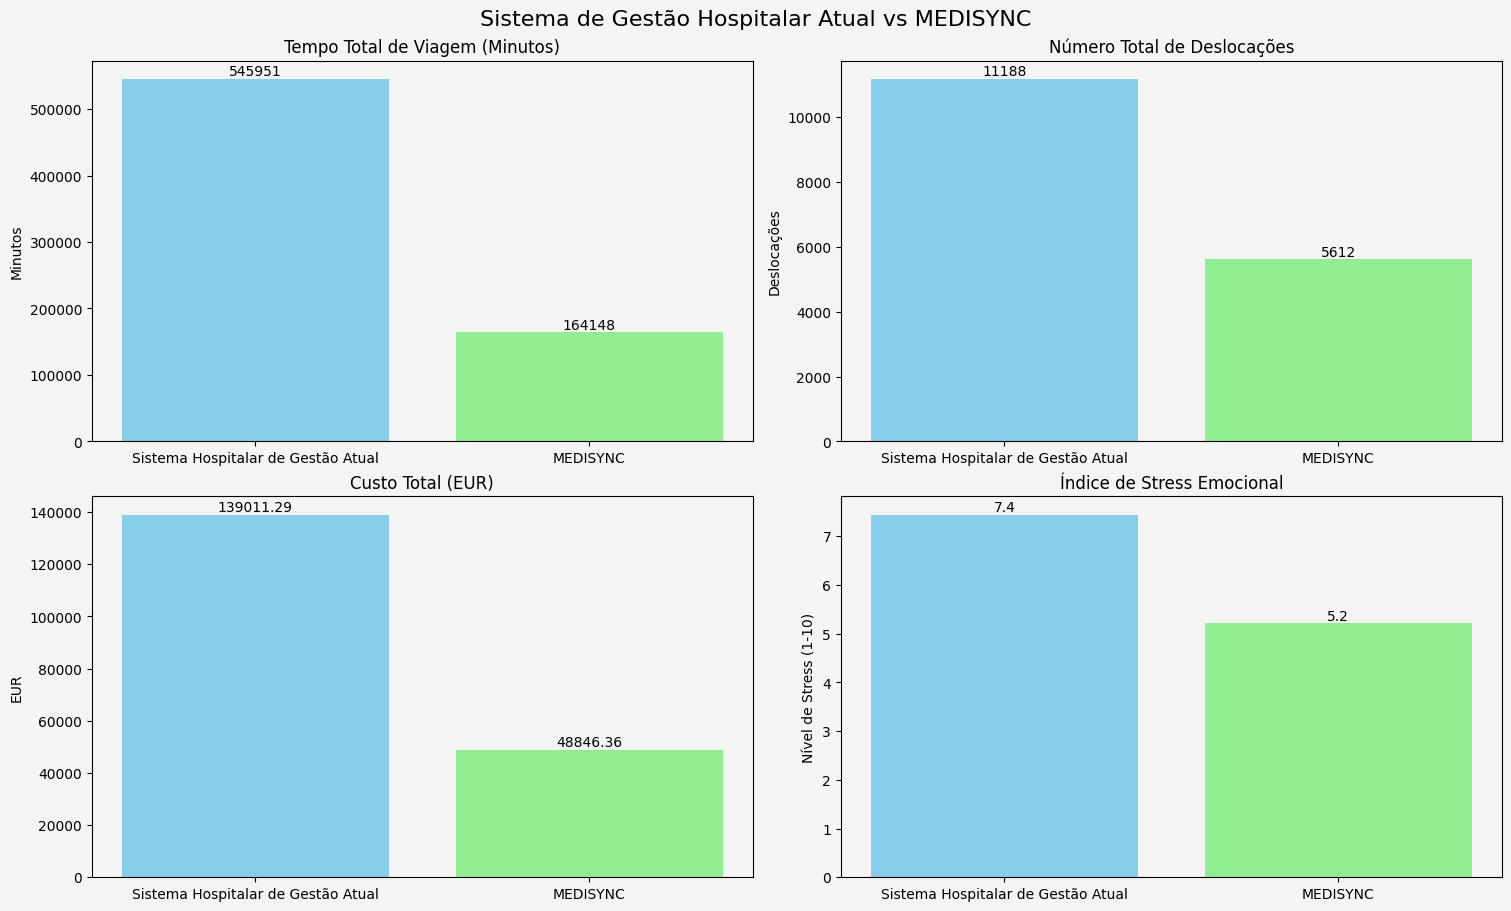

In [ ]:
# Plot the metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 9), constrained_layout=True)

# Set figure background color
fig.patch.set_facecolor('#f4f4f4')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Total Travel Time
axes[0].bar(metrics_df["System"], metrics_df["Tempo Total de Viagem"], color=["skyblue", "lightgreen"])
axes[0].set_title("Tempo Total de Viagem (Minutos)")
axes[0].set_ylabel("Minutos")
axes[0].set_facecolor("#f4f4f4")  # Custom background color
for i, value in enumerate(metrics_df["Tempo Total de Viagem"]):
    axes[0].text(i, value + 10, f"{value:.0f}", ha='center', va='bottom', fontsize=10)

# Number of Trips
axes[1].bar(metrics_df["System"], metrics_df["Número Total de Deslocações"], color=["skyblue", "lightgreen"])
axes[1].set_title("Número Total de Deslocações")
axes[1].set_ylabel("Deslocações")
axes[1].set_facecolor("#f4f4f4")
for i, value in enumerate(metrics_df["Número Total de Deslocações"]):
    axes[1].text(i, value + 10, f"{value:.0f}", ha='center', va='bottom', fontsize=10)

# Total Travel Cost
axes[2].bar(metrics_df["System"], metrics_df["Custo Total"], color=["skyblue", "lightgreen"])
axes[2].set_title("Custo Total (EUR)")
axes[2].set_ylabel("EUR")
axes[2].set_facecolor("#f4f4f4")
for i, value in enumerate(metrics_df["Custo Total"]):
    axes[2].text(i, value + 10, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Average Stress Level
axes[3].bar(metrics_df["System"], metrics_df["Índice de Stress Emocional"], color=["skyblue", "lightgreen"])
axes[3].set_title("Índice de Stress Emocional")
axes[3].set_ylabel("Nível de Stress (1-10)")
axes[3].set_facecolor("#f4f4f4")
for i, value in enumerate(metrics_df["Índice de Stress Emocional"]):
    axes[3].text(i, value + 0.01, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

plt.suptitle("Sistema de Gestão Hospitalar Atual vs MEDISYNC", fontsize=16)
plt.savefig('aval.png',dpi=400)
plt.show()
